<img src="../img/logo.jpg" alt="header" style="height:200px;">
<h1><center>Practica 4 Binary Mathematical Morphology</center></h1>
<h3><b>Alumno:</b> Mothelet Delgado Izaird Alexander</h3>
<h3><b>Boleta:</b> 2012010743</h3>
<h3><b>Grupo:</b> 3CV7</h3>
<h2><center><b>Introducción</b></center></h2>
<h3><b>Morfologia matematica</b></h3>
<p align="justify">Las operaciones morfológicas básicas, erosión y dilatación, producen resultados contrastantes cuando se aplican a imágenes en escala de grises o binarias. La erosión encoge los objetos de imagen mientras que la dilatación los expande. </p>

<p align="justify">Los operadores de morfología matemática son un conjunto de filtros locales sencillos, que se pueden combinar para obtener resultados más complejos.</p>

<p align="justify">Originalmente, están definidos sobre imágenes binarias.</p>

<p align="justify">La idea es muy parecida a una convolución, pero utilizando las operaciones booleanas AND y OR.</p>
<img src="../img/morfo_00.png">

<p align="justify">El elemento estructurante define los píxeles que se usan en la operación y los que no. Dado un elemento estructurante, E, de cierta forma y
tamaño, y una imagen binaria B, se definen dos operaciones: </p>


<h2 align="center">Dilatación</h2>
<img src="../img/morfo_01.png">


<p align="center">
Combinar con OR los valores correspondientes a los píxeles 1 del elemento estructurante.
 </p>
    
    
<h2 align="center">Erosión</h2>
<img src="../img/morfo_02.png">


<p align="center">
Combinar con AND los valores correspondientes a los píxeles 1 del elemento estructurante.
 </p>
 
 
<p align="center">
El efecto de la dilatación es extender o ampliar las regiones de la imagen con valor 1 (color blanco), mientras que la erosión las reduce. La cantidad depende del tamaño y forma del elemento estructurante y del número de veces que se aplican.
</p>


In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import io, color
from skimage import exposure
import pylab

%matplotlib inline

In [2]:
def dilation(image, mask):
    output = image         # dilation output
    mask_res = []
    va = (mask.shape[1] - 1)/2
    image_padded = np.zeros((image.shape[0] + (mask.shape[1]-1), image.shape[1] + (mask.shape[1]-1)))   
    image_padded[int(va):int(-va), int(va):int(-va)] = image

    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            for xmask in range(mask.shape[1]):
                for ymask in range(mask.shape[0]):
                    mask_res.append(image_padded[y+ymask, x+xmask] + mask[ymask,xmask])
            A = max(mask_res)
            if A > 255:
                output[y,x] = 255
            elif A < 0:
                output[y,x] = 0
            else:
                output[y,x] = A
            mask_res = []
    return output

def erosion(image, mask):
    output = image         # dilation output
    mask_res = []
    va = (mask.shape[1] - 1)/2
    image_padded = np.zeros((image.shape[0] + (mask.shape[1]-1), image.shape[1] + (mask.shape[1]-1)))   
    image_padded[int(va):int(-va), int(va):int(-va)] = image

    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            for xmask in range(mask.shape[1]):
                for ymask in range(mask.shape[0]):
                    mask_res.append(image_padded[y+ymask, x+xmask] - mask[ymask,xmask])
            A = min(mask_res)
            if A > 255:
                output[y,x] = 255
            elif A < 0:
                output[y,x] = 0
            else:
                output[y,x] = A
            mask_res = []
    return output

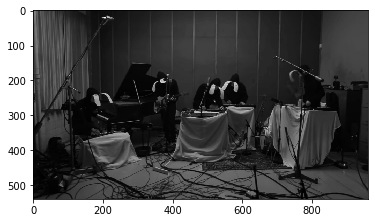

In [3]:
pic1=Image.open("../Practica_03/img/pic_01.png").convert("L") #Open the image and convert to gray scale 
pic_arr1 = np.asarray(pic1,np.uint) #converts the image to an Numpy Array
plt.imshow(pic_arr1,cmap=plt.cm.gray)
pic1=Image.open("../Practica_03/img/pic_02.png").convert("L") #Open the image and convert to gray scale 
pic_arr2 = np.asarray(pic1,np.uint) #converts the image to an Numpy Array
plt.imshow(pic_arr2,cmap=plt.cm.gray)

In [4]:
mask = np.array([[0,100,0],[100,100,100],[0,100,0]])

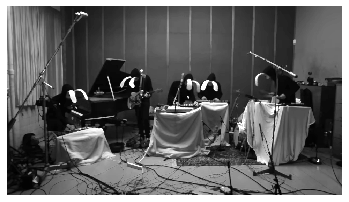

In [5]:
new_image = dilation(pic_arr1, mask)
plt.imshow(new_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

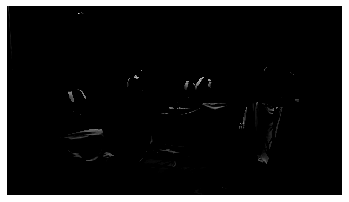

In [6]:
new_image2 = erosion(pic_arr2, mask)
plt.imshow(new_image2, cmap=plt.cm.gray)
plt.axis('off')
plt.show()